# Analysis of the data obtained from OpenAgrar

In [4]:
import pandas as pd
import json

## Load the full Openagrar dataset (including datasets and articles)

In [2]:
openagrar = pd.read_csv("/home/abdelmalak/Documents/FairAgro UC/OpenAgrar_data/output_datasets/output.csv", sep="|")

In [5]:
with open("/home/abdelmalak/Documents/FairAgro UC/OpenAgrar_data/output_datasets/output.json", "r") as data:
    openagrar_json= json.load(data)

### Narrow down to only articles and ti or jki publishers

In [31]:
filtered_df = openagrar[openagrar['institute'].str.contains('ti|jki', case=False, na=False)]
articles = filtered_df[openagrar['Type'].str.contains('article', case=False, na=False)]

/tmp/ipykernel_31748/4054845267.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  articles = filtered_df[openagrar['Type'].str.contains('article', case=False, na=False)]


### Create a filtering criteria based on sub-institutes

In [30]:
institutes = [
    "Crop and Soil Science",
    "Strategies and Technology Assessment",
    "Biological Control",
    "Plant Protection in Horticulture and Urban Green",
    "Breeding Research on Agricultural Crops",
    "Breeding Research on Horticultural Crops"
]
pattern = "|".join(institutes)


396


### Apply the filtering criterea

In [33]:
filtered_institutes = articles[articles["authors_names"].str.contains(pattern, na=False)]

In [36]:
filtered_institutes = filtered_institutes[filtered_institutes['publication_year']>=2018]
len(filtered_institutes)

322

### Save the articles in a csv file in order to save them as text files

In [38]:
filtered_file = "/home/abdelmalak/Documents/FairAgro UC/repo/pilot-uc-textmining-metadata/data/OpenAgrar/outputs/final_articles.csv"
filtered_institutes.to_csv(filtered_file, sep='|')

## Load the datasets in OpenAgrar

In [6]:
openagrar_datasets = pd.read_csv("/home/abdelmalak/Documents/FairAgro UC/OpenAgrar_data/output.csv", sep="|")

In [7]:
datasets = openagrar_datasets[openagrar_datasets['institute'].str.contains('ti|jki', case=False, na=False)]
len(datasets)

424

In [10]:
#filtered_datasets = datasets[datasets["authors_names"].str.contains(pattern, na=False)]
filtered_datasets = datasets[datasets['publication_year']>=2018]
len(filtered_datasets)

412

In [11]:
filtered_file = "/home/abdelmalak/Documents/FairAgro UC/repo/pilot-uc-textmining-metadata/data/OpenAgrar/outputs/final_datasets.csv"
filtered_datasets.to_csv(filtered_file, sep='|')

In [5]:
openagrar.to_excel("output.xlsx")

## Analysis of the full dataset

In [5]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import json
from collections import Counter

In [7]:
len(openagrar)

18165

In [6]:
openagrar.head()

,ID,title,abstract_text,publisher,publication_year,institute,authors_names,subjects,language,Type
0,48461,Reduktion des Unkrautdruckes durch die Etablie...,"""Am Thünen-Institut für Ökologischen Landbau (...",Julius Kühn-Institut,2016,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Lupinus angustifolius', 'Ökologischer Landba...",de,article
1,48384,Sainfoin seeds as protein source for weaned pi...,"""Sainfoin (Onobrychis viciifolia) has been use...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Sainfoin', 'protein', 'piglets', 'legume']",en,article
2,48255,Unkraut unterdrückende Wirkung von Saatwicken ...,"""Saatwicken ( Vicia sativa L.) werden derzeit ...",Julius Kühn-Institut,2014,ti,"{'creatorName': {'@nameType': 'Personal', '#te...","['ökologischer Landbau', 'Saatstärke', 'Sorte'...",de,article
3,48254,Untersuchungen zur Unkrautunterdrückung in Rei...,"""Derzeit stehen normalblättrige, langwüchsige ...",Julius Kühn-Institut,2014,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Halbblattlos', 'Konkurrenz', 'normalblättrig...",de,article
4,47994,Prevalence of udder infections and effects on ...,"""The objective of this study was to investigat...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['dairy goat', 'staphylococci', 'SCC', 'milk y...",en,article


In [8]:
openagrar['Type'].value_counts().reset_index()

,Type,count
0,article,17727
1,ResearchData,438


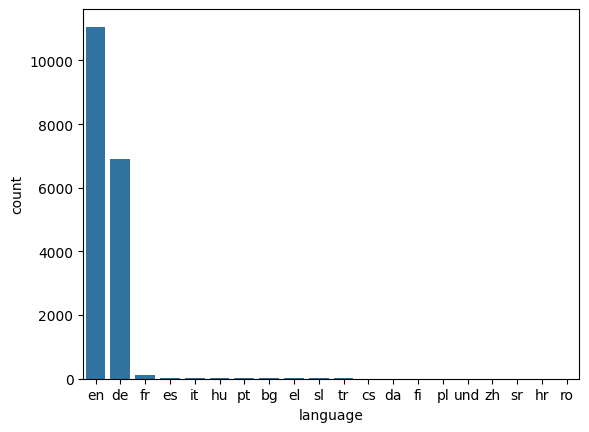

In [9]:
# define Seaborn color palette to use 
sns.barplot(x="language",
           y="count",
           data=openagrar['language'].value_counts().reset_index())
# displaying chart 
plt.show()

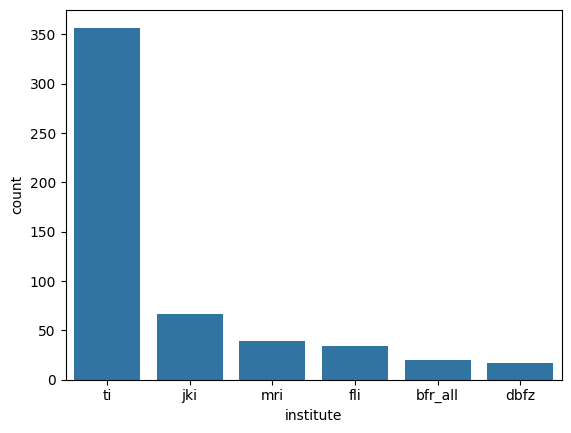

In [92]:
# define Seaborn color palette to use 
sns.barplot(x="institute",
           y="count",
           data=openagrar['institute'].value_counts().reset_index())
# displaying chart 
plt.show()

In [96]:
filtered_df['institute'].value_counts().reset_index().head(10)

,institute,count
0,ti,357
1,jki,67


In [97]:
subjects = filtered_df['subjects']
all_subjects = []
counter = 0
for sub in subjects: 
    try:
        if isinstance(sub, str):
            data = ast.literal_eval(sub.lower())
            if not isinstance(data, dict):
                all_subjects.extend(data)
                for h in data: 
                    if 'soil' in str(h):
                        coounter += 1
                        break
    except:
        #print(sub)
        continue
print(counter)

0


In [83]:
final_subjects = []
for i in all_subjects:
    if isinstance(i, dict):
        continue
    else:
        final_subjects.append(i)

In [84]:
subjects_conter= Counter(final_subjects)

In [85]:
isinstance(subjects_conter, dict)

True

In [ ]:
total_soil_mentions = 0
for i, val in zip(subjects_conter.keys(), subjects_conter.values()):
    if 'crop' in i:
        print(i, val)
        total_soil_mentions += val
print(f'Total soil mentions = {total_soil_mentions}')

In [ ]:
subjects_conter.most_common()

In [7]:
# Filter out rows that do not contain 'en'
#filtered_df = openagrar[openagrar['language'].str.contains('en', case=False, na=False)]

In [24]:
filtered_df = openagrar[openagrar['institute'].str.contains('ti|jki', case=False, na=False)]
articles = filtered_df[openagrar['Type'].str.contains('article', case=False, na=False)]

/tmp/ipykernel_31748/4054845267.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  articles = filtered_df[openagrar['Type'].str.contains('article', case=False, na=False)]


In [26]:
len(articles)

7090

In [26]:
filtered_df['authors_names'][0]

True

Show the distributions of years and the distributions of institutes

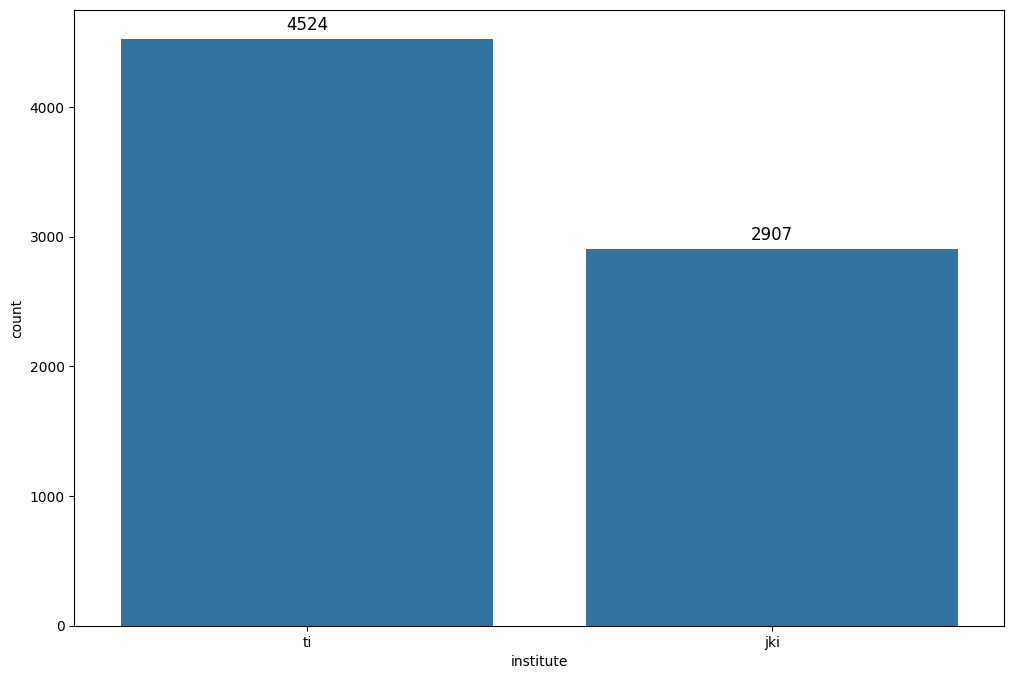

In [13]:
# define Seaborn color palette to use 
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="institute",
           y="count",
           data=filtered_df['institute'].value_counts().reset_index())

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# displaying chart 
plt.show()

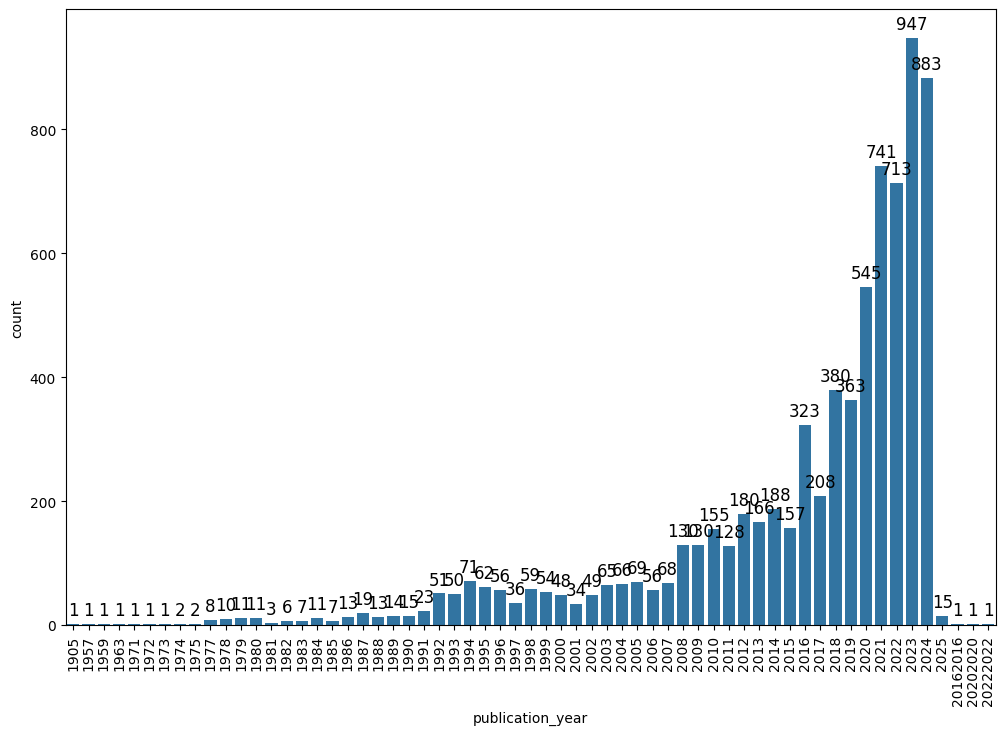

In [14]:
# Set the figure size to make the plot fill the notebook cell
plt.figure(figsize=(12, 8))

# Create the barplot
ax = sns.barplot(x="publication_year", y="count", data=filtered_df['publication_year'].value_counts().reset_index())

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# Display the chart
plt.show()

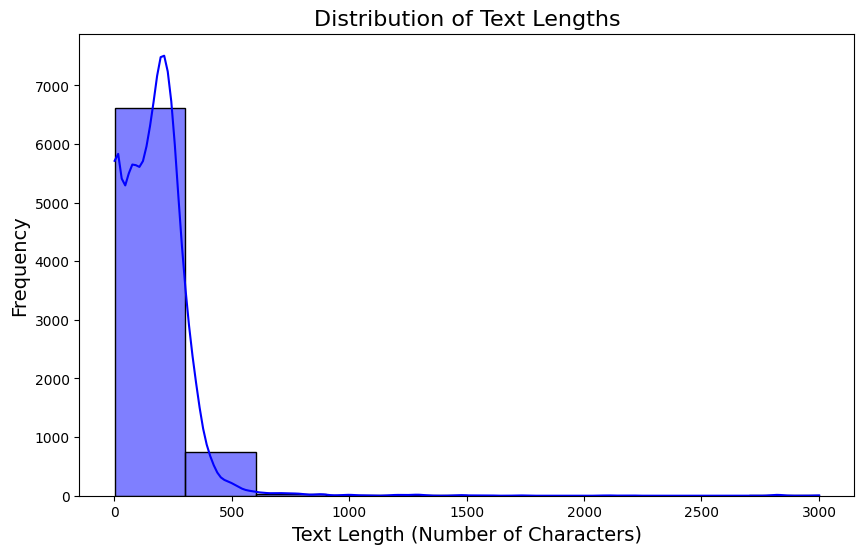

In [15]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of text lengths directly using apply() within sns.histplot
sns.histplot(filtered_df['abstract_text'].apply(lambda x: len(x.split(' '))), kde=True, color='blue', bins=10)

# Add labels and title
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [98]:
filtered_file = "/home/abdelmalak/Documents/FairAgro UC/repo/pilot-uc-textmining-metadata/data/OpenAgrar/outputs/final.csv"
filtered_df.to_csv(filtered_file, sep='|')

In [80]:
filtered_df = filtered_df[filtered_df['publication_year']>=2018]

In [17]:
len(filtered_df)

3670